# Guided Capstone 2 - NBA Win Model Prediction Using Machine Learning

# Section 0: Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math
from datetime import datetime

# Section 1: Data Import and combination

In our investigation, our attempt to recreate the prior investigators model will require data of the same time period and features. In the prior investigation, the data used produce their NBA win prediction model covered a 12 season span, between the seasons of 2008 - 2009 to 2019 - 2020. 

Kaggale offers several databases that include the data portion mentioned above, and can be wrangled to reflect the data of the prior investigation 

# Section 1 Data Wrangling

# 1.1 Data Stitching

From Kaggle, separate sets have been acquired for both individual players statistics per game, and team statistics per game. These sets are separated by season.

In [2]:
#Below code appends datasets together based on file names.
start_year = 2008
end_year = 2009

team_stats = pd.DataFrame()
player_stats = pd.DataFrame()

for i in range(12) :
    player_stats_file_path = '/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/DS_Guided_Capstone_2_Repo/virenv/player_stats/' + str(start_year) + "-" + str(end_year) + '.csv'
    team_stats_file_path = '/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/DS_Guided_Capstone_2_Repo/virenv/team_stats/' + str(start_year) + "-" + str(end_year) + '.csv'
    player_stats = player_stats.append(pd.read_csv(player_stats_file_path))
    team_stats = team_stats.append(pd.read_csv(team_stats_file_path))
    
    start_year = start_year + 1
    end_year = end_year + 1

In [3]:
player_stats.shape

(373069, 26)

In [4]:
player_stats.head()

,Player,Date,Team,Against,Home,MP,FG,FGA,FG%,3P,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,+/-,GameLink
0,LeBron James,2008-10-28,Cleveland Cavaliers,Boston Celtics,0,36.00,9.0,21.0,0.429,0.0,...,6.0,7.0,6.0,2.0,1.0,3.0,4.0,22.0,-3.0,https://www.basketball-reference.com/boxscores...
1,Delonte West,2008-10-28,Cleveland Cavaliers,Boston Celtics,0,35.29,2.0,4.0,0.500,0.0,...,2.0,2.0,2.0,0.0,0.0,1.0,0.0,6.0,-10.0,https://www.basketball-reference.com/boxscores...
2,Mo Williams,2008-10-28,Cleveland Cavaliers,Boston Celtics,0,31.18,4.0,10.0,0.400,3.0,...,3.0,3.0,2.0,1.0,0.0,4.0,5.0,12.0,3.0,https://www.basketball-reference.com/boxscores...
3,Zydrunas Ilgauskas,2008-10-28,Cleveland Cavaliers,Boston Celtics,0,30.24,3.0,5.0,0.600,0.0,...,5.0,8.0,1.0,0.0,0.0,4.0,3.0,15.0,7.0,https://www.basketball-reference.com/boxscores...
4,Ben Wallace,2008-10-28,Cleveland Cavaliers,Boston Celtics,0,19.03,1.0,1.0,1.000,0.0,...,4.0,4.0,0.0,0.0,1.0,1.0,2.0,2.0,-1.0,https://www.basketball-reference.com/boxscores...


In [5]:
player_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 373069 entries, 0 to 27739
Data columns (total 26 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Player    373069 non-null  object 
 1   Date      373069 non-null  object 
 2   Team      373069 non-null  object 
 3   Against   373069 non-null  object 
 4   Home      373069 non-null  int64  
 5   MP        311326 non-null  float64
 6   FG        311326 non-null  float64
 7   FGA       311326 non-null  float64
 8   FG%       295932 non-null  float64
 9   3P        311326 non-null  float64
 10  3PA       311326 non-null  float64
 11  3P%       199196 non-null  float64
 12  FT        311326 non-null  float64
 13  FTA       311326 non-null  float64
 14  FT%       179762 non-null  float64
 15  ORB       311326 non-null  float64
 16  DRB       311326 non-null  float64
 17  TRB       311326 non-null  float64
 18  AST       311326 non-null  float64
 19  STL       311326 non-null  float64
 20  BLK  

In [6]:
team_stats.shape

(15348, 124)

In [7]:
team_stats.head()

,gmDate,seasonType,season,teamWins,teamLosses,teamAbbr,teamLoc,teamRslt,teamDayOff,teamPTS,...,opptOrtg,opptDrtg,opptEDiff,opptPlay%,opptAR,opptAST/TO,opptSTL/TO,opptPoss,opptPace,matchWinner
0,2008-10-28,Regular,2008-09,0,1,CLE,Away,Loss,0.0,85.0,...,96.9,91.5,5.4,0.41,17.57,1.00,0.62,92.9,92.9,BOS
1,2008-10-28,Regular,2008-09,0,1,MIL,Away,Loss,0.0,95.0,...,120.3,105.8,14.5,0.48,28.53,1.50,0.50,89.8,89.8,CHI
2,2008-10-28,Regular,2008-09,0,1,POR,Away,Loss,0.0,76.0,...,107.7,85.3,22.4,0.44,18.08,1.27,0.53,89.1,89.1,LAL
3,2008-10-29,Regular,2008-09,1,0,TOR,Away,Win,0.0,95.0,...,99.8,112.8,-13.0,0.37,14.47,0.88,0.18,84.2,84.2,TOR
4,2008-10-29,Regular,2008-09,1,0,NJN,Away,Win,0.0,95.0,...,94.6,105.7,-11.1,0.36,17.86,1.20,0.27,89.9,89.9,NJN


In [8]:
team_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15348 entries, 0 to 1142
Columns: 124 entries, gmDate to matchWinner
dtypes: float64(110), int64(4), object(10)
memory usage: 14.6+ MB


In [9]:
team_stats.to_csv('Team_Stats.csv')

# 1.2 Cleaning player_stats

In [10]:
#Reorder columns and naming
col = ['Player', 'Team', 'Against', 'Date']
other = [x for x in player_stats.columns if x not in col]
player_stats= player_stats[col + other]

In [11]:
#Dropping unecessary columns

player_stats.drop(columns = ['FG%', '3P%', 'FT%', 'GameLink'], inplace = True)

#'GameLink' turns out to be strings with no interesting information. If the full link was available, possible use to create Game IDs based on URL, however, that is not the case, and this column should be removed as it provides nothing of value.

In [12]:
#Checking for isnull()

player_stats.isna().sum()

Player         0
Team           0
Against        0
Date           0
Home           0
MP         61743
FG         61743
FGA        61743
3P         61743
3PA        61743
FT         61743
FTA        61743
ORB        61743
DRB        61743
TRB        61743
AST        61743
STL        61743
BLK        61743
TOV        61743
PF         61743
PTS        61743
+/-        61793
dtype: int64

While evaluating the NA values, we see that we do have a good chunk of NaN data. It is clear that we are not looking at players who received 0 stats sucha as 0 pts or rebounds. Instead the data clearly records players who played zero mins have NaN's in their stats. 

In the +/- column, there's always a chance that the player contributed, but their +/- is still 0. This is quite possible as +/- is a stat recorded based on both team performances during the time the player is playing. 

In [13]:
player_stats = player_stats[player_stats['MP'].notna()]

In [14]:
player_stats.isna().sum()

Player      0
Team        0
Against     0
Date        0
Home        0
MP          0
FG          0
FGA         0
3P          0
3PA         0
FT          0
FTA         0
ORB         0
DRB         0
TRB         0
AST         0
STL         0
BLK         0
TOV         0
PF          0
PTS         0
+/-        50
dtype: int64

In [15]:
#Converting 'Date' column to datetime object
player_stats['Date'] = pd.to_datetime(player_stats['Date'])

In [16]:
player_stats[player_stats['Home'] == 1].head()

,Player,Team,Against,Date,Home,MP,FG,FGA,3P,3PA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,+/-
12,Ray Allen,Boston Celtics,Cleveland Cavaliers,2008-10-28,1,40.39,2.0,9.0,1.0,4.0,...,1.0,3.0,4.0,1.0,1.0,0.0,4.0,1.0,8.0,-1.0
13,Paul Pierce,Boston Celtics,Cleveland Cavaliers,2008-10-28,1,38.13,10.0,19.0,2.0,4.0,...,1.0,2.0,3.0,4.0,1.0,0.0,2.0,4.0,27.0,12.0
14,Kevin Garnett,Boston Celtics,Cleveland Cavaliers,2008-10-28,1,36.09,5.0,15.0,0.0,0.0,...,1.0,5.0,6.0,2.0,2.0,0.0,2.0,1.0,11.0,5.0
15,Rajon Rondo,Boston Celtics,Cleveland Cavaliers,2008-10-28,1,29.57,4.0,5.0,0.0,0.0,...,1.0,4.0,5.0,6.0,3.0,0.0,2.0,5.0,14.0,4.0
16,Kendrick Perkins,Boston Celtics,Cleveland Cavaliers,2008-10-28,1,20.50,1.0,2.0,0.0,0.0,...,4.0,4.0,8.0,0.0,0.0,0.0,2.0,6.0,2.0,-7.0


In [17]:
test1 = player_stats[player_stats['Date'] == '2020-8-14']
test1

,Player,Team,Against,Date,Home,MP,FG,FGA,3P,3PA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,+/-
25566,Jerami Grant,Denver Nuggets,Toronto Raptors,2020-08-14,0,18.18,1.0,6.0,0.0,3.0,...,1.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0
25567,Paul Millsap,Denver Nuggets,Toronto Raptors,2020-08-14,0,15.30,4.0,8.0,2.0,3.0,...,1.0,2.0,3.0,2.0,2.0,1.0,1.0,2.0,10.0,-4.0
25568,Torrey Craig,Denver Nuggets,Toronto Raptors,2020-08-14,0,14.58,1.0,6.0,1.0,3.0,...,1.0,3.0,4.0,3.0,0.0,0.0,1.0,0.0,3.0,-6.0
25569,Jamal Murray,Denver Nuggets,Toronto Raptors,2020-08-14,0,10.12,4.0,5.0,3.0,3.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,11.0,-6.0
25570,Nikola Jokić,Denver Nuggets,Toronto Raptors,2020-08-14,0,10.12,1.0,1.0,0.0,0.0,...,0.0,1.0,1.0,2.0,0.0,0.0,1.0,0.0,2.0,-6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25648,Chris Clemons,Houston Rockets,Philadelphia 76ers,2020-08-14,1,16.36,2.0,7.0,0.0,5.0,...,0.0,1.0,1.0,4.0,1.0,1.0,1.0,4.0,4.0,-23.0
25649,Michael Frazier,Houston Rockets,Philadelphia 76ers,2020-08-14,1,16.36,0.0,4.0,0.0,4.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,-23.0
25650,Luc Mbah a Moute,Houston Rockets,Philadelphia 76ers,2020-08-14,1,13.55,1.0,3.0,0.0,2.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,-14.0
25651,Austin Rivers,Houston Rockets,Philadelphia 76ers,2020-08-14,1,12.21,0.0,2.0,0.0,2.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,-16.0


In [18]:
player_stats['Team'].unique()

array(['Cleveland Cavaliers', 'Boston Celtics', 'Milwaukee Bucks',
       'Chicago Bulls', 'Portland Trail Blazers', 'Los Angeles Lakers',
       'Toronto Raptors', 'Philadelphia 76ers', 'New Jersey Nets',
       'Washington Wizards', 'Atlanta Hawks', 'Orlando Magic',
       'Miami Heat', 'New York Knicks', 'Phoenix Suns',
       'San Antonio Spurs', 'Oklahoma City Thunder', 'Sacramento Kings',
       'Minnesota Timberwolves', 'Indiana Pacers', 'Detroit Pistons',
       'Memphis Grizzlies', 'Houston Rockets', 'Denver Nuggets',
       'Utah Jazz', 'Los Angeles Clippers', 'New Orleans Hornets',
       'Golden State Warriors', 'Charlotte Bobc', 'Dallas Mavericks',
       'Charlotte Bobcats', 'Brooklyn Nets', 'New Orleans Pelicans',
       'Charlotte Hornets'], dtype=object)

In [19]:
player_stats.Home.isnull().sum()

0

In [20]:
player_stats.reset_index(drop = True, inplace = True)

In [21]:
#Removing non-regular season games
dates =[['2008-10-28', '2009-04-16'],['2009-10-27', '2010-04-14'], ['2010-10-26', '2011-04-13' ], ['2011-12-25', '2012-04-26'], ['2012-10-30', '2013-04-17'], ['2013-10-29', '2014-04-16'], ['2014-10-28', '2015-04-15'], ['2015-10-27', '2016-04-13'], ['2016-10-25', '2017-04-12'], ['2017-10-17', '2018-04-11'], ['2018-10-16', '2019-04-10'], ['2019-10-22', '2020-08-14' ]]
is_regsea = lambda date : (date>= pd.to_datetime(start_date)) & (date<= pd.to_datetime(end_date))
all_regsea = pd.DataFrame()

for start_date, end_date in dates:
    print(start_date, end_date)
    all_regsea = pd.concat([all_regsea, player_stats.Date.apply(is_regsea)], axis=1)


2008-10-28 2009-04-16
2009-10-27 2010-04-14
2010-10-26 2011-04-13
2011-12-25 2012-04-26
2012-10-30 2013-04-17
2013-10-29 2014-04-16
2014-10-28 2015-04-15
2015-10-27 2016-04-13
2016-10-25 2017-04-12
2017-10-17 2018-04-11
2018-10-16 2019-04-10
2019-10-22 2020-08-14


In [22]:
all_regsea = all_regsea.sum(axis=1)
regsea = np.where(all_regsea == 1)[0]
player_stats = player_stats.loc[regsea]

In [23]:
#Knowing some NBA history, there are teams that have moved cities and changed names
#we will set the GameID's to have consistency with the team and their history (per our duration of interest)
#NJN moved to Brooklyn and known now as the BKN
#New Orleans Hornets are now the New Orlean Pelicans
#Charlotte Bobcats are the Charlotte Hornets 
name_change = player_stats[['Team', 'Against', 'Home']]

name_change['Team'] = name_change['Team'].replace({'New York Knicks' : 'NYK', 'New Jersey Nets': 'BKN', 'Brooklyn Nets':'BKN', 'New Orleans Hornets':'NOP', 'Charlotte Bobcats':'CHO', 'Charlotte Bobc':'CHO', 'Charlotte Hornets':'CHO', 'New Orleans Pelicans':'NOP', 'Los Angeles Lakers':'LAL', 'Los Angeles Clippers':'LAC' })
name_change['Against'] = name_change['Against'].replace({'New York Knicks' : 'NYK', 'New Jersey Nets': 'BKN', 'Brooklyn Nets':'BKN', 'New Orleans Hornets':'NOP', 'Charlotte Bobcats':'CHO', 'Charlotte Bobc':'CHO', 'Charlotte Hornets':'CHO', 'New Orleans Pelicans':'NOP', 'Los Angeles Lakers':'LAL', 'Los Angeles Clippers':'LAC' })


<ipython-input-23-ce389f236851>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  name_change['Team'] = name_change['Team'].replace({'New York Knicks' : 'NYK', 'New Jersey Nets': 'BKN', 'Brooklyn Nets':'BKN', 'New Orleans Hornets':'NOP', 'Charlotte Bobcats':'CHO', 'Charlotte Bobc':'CHO', 'Charlotte Hornets':'CHO', 'New Orleans Pelicans':'NOP', 'Los Angeles Lakers':'LAL', 'Los Angeles Clippers':'LAC' })
<ipython-input-23-ce389f236851>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  name_change['Against'] = n

In [24]:
#Pulling the home team's name abbreviation.
name_change['abbr'] = np.where(name_change['Home']==1, name_change['Team'].str[0:3].str.upper(), name_change['Against'].str[0:3].str.upper())

<ipython-input-24-9081e4525c91>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  name_change['abbr'] = np.where(name_change['Home']==1, name_change['Team'].str[0:3].str.upper(), name_change['Against'].str[0:3].str.upper())


In [25]:
#Abbreviations work for some team names, but not all team names use the abbreviation of the first name. 
name_change['abbr'] = name_change['abbr'].replace({'SAN':'SAS', 'OKL': 'OKC', 'GOL':'GSW'})

<ipython-input-25-44db675c6e44>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  name_change['abbr'] = name_change['abbr'].replace({'SAN':'SAS', 'OKL': 'OKC', 'GOL':'GSW'})


In [26]:
player_stats['gameID'] =  player_stats['Date'].dt.strftime('%Y%m%d') + name_change['abbr']
player_stats.head()

,Player,Team,Against,Date,Home,MP,FG,FGA,3P,3PA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,+/-,gameID
0,LeBron James,Cleveland Cavaliers,Boston Celtics,2008-10-28,0,36.00,9.0,21.0,0.0,4.0,...,6.0,7.0,6.0,2.0,1.0,3.0,4.0,22.0,-3.0,20081028BOS
1,Delonte West,Cleveland Cavaliers,Boston Celtics,2008-10-28,0,35.29,2.0,4.0,0.0,1.0,...,2.0,2.0,2.0,0.0,0.0,1.0,0.0,6.0,-10.0,20081028BOS
2,Mo Williams,Cleveland Cavaliers,Boston Celtics,2008-10-28,0,31.18,4.0,10.0,3.0,5.0,...,3.0,3.0,2.0,1.0,0.0,4.0,5.0,12.0,3.0,20081028BOS
3,Zydrunas Ilgauskas,Cleveland Cavaliers,Boston Celtics,2008-10-28,0,30.24,3.0,5.0,0.0,0.0,...,5.0,8.0,1.0,0.0,0.0,4.0,3.0,15.0,7.0,20081028BOS
4,Ben Wallace,Cleveland Cavaliers,Boston Celtics,2008-10-28,0,19.03,1.0,1.0,0.0,0.0,...,4.0,4.0,0.0,0.0,1.0,1.0,2.0,2.0,-1.0,20081028BOS


In [27]:
player_stats.sort_values(by = 'Date', ascending = False, inplace = True)
player_stats.reset_index(inplace = True, drop = True)

In [28]:
player_stats.shape

(291008, 23)

In [29]:
clean_player_stats = player_stats

In [30]:
clean_player_stats.head()

,Player,Team,Against,Date,Home,MP,FG,FGA,3P,3PA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,+/-,gameID
0,Ben McLemore,Houston Rockets,Philadelphia 76ers,2020-08-14,1,11.21,1.0,4.0,1.0,3.0,...,2.0,2.0,1.0,1.0,0.0,0.0,0.0,3.0,-17.0,20200814HOU
1,Chris Silva,Miami Heat,Indiana Pacers,2020-08-14,0,24.29,2.0,4.0,0.0,0.0,...,7.0,11.0,1.0,0.0,3.0,1.0,3.0,5.0,-12.0,20200814IND
2,Dewan Hernandez,Toronto Raptors,Denver Nuggets,2020-08-14,1,12.42,2.0,6.0,0.0,0.0,...,4.0,7.0,1.0,0.0,0.0,1.0,0.0,4.0,0.0,20200814TOR
3,Kendrick Nunn,Miami Heat,Indiana Pacers,2020-08-14,0,32.58,8.0,27.0,1.0,9.0,...,1.0,2.0,4.0,3.0,1.0,5.0,1.0,23.0,-21.0,20200814IND
4,Tyler Herro,Miami Heat,Indiana Pacers,2020-08-14,0,27.56,6.0,16.0,3.0,8.0,...,0.0,1.0,3.0,0.0,0.0,3.0,2.0,16.0,-10.0,20200814IND


# 1.3 Saving Cleaned Player Stats Data To CSV

In [31]:
clean_player_stats.to_csv('Cleaned_Player_Stats.csv')

# 1.3 Cleaning team_stats

In [32]:
#read in team_stats
team_stats = pd.read_csv('Team_Stats.csv')

In [33]:
team_stats.reset_index(drop=True)

,Unnamed: 0,gmDate,seasonType,season,teamWins,teamLosses,teamAbbr,teamLoc,teamRslt,teamDayOff,...,opptOrtg,opptDrtg,opptEDiff,opptPlay%,opptAR,opptAST/TO,opptSTL/TO,opptPoss,opptPace,matchWinner
0,0,2008-10-28,Regular,2008-09,0,1,CLE,Away,Loss,0.0,...,96.9,91.5,5.4,0.41,17.57,1.00,0.62,92.9,92.9,BOS
1,1,2008-10-28,Regular,2008-09,0,1,MIL,Away,Loss,0.0,...,120.3,105.8,14.5,0.48,28.53,1.50,0.50,89.8,89.8,CHI
2,2,2008-10-28,Regular,2008-09,0,1,POR,Away,Loss,0.0,...,107.7,85.3,22.4,0.44,18.08,1.27,0.53,89.1,89.1,LAL
3,3,2008-10-29,Regular,2008-09,1,0,TOR,Away,Win,0.0,...,99.8,112.8,-13.0,0.37,14.47,0.88,0.18,84.2,84.2,TOR
4,4,2008-10-29,Regular,2008-09,1,0,NJN,Away,Win,0.0,...,94.6,105.7,-11.1,0.36,17.86,1.20,0.27,89.9,89.9,NJN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15343,1138,2020-09-24,Playoffs,2019-20,3,1,LAL,Away,Win,1.0,...,120.4,127.1,-6.7,0.48,22.03,2.00,0.36,89.7,89.7,LAL
15344,1139,2020-09-25,Playoffs,2019-20,3,2,MIA,Away,Loss,1.0,...,119.6,106.7,12.9,0.46,24.12,2.64,0.64,101.2,101.2,BOS
15345,1140,2020-09-26,Playoffs,2019-20,1,4,DEN,Away,Loss,1.0,...,119.1,108.9,10.2,0.49,23.71,1.85,0.46,98.2,98.2,LAL
15346,1141,2020-09-27,Playoffs,2019-20,2,4,BOS,Away,Loss,1.0,...,125.2,113.2,12.0,0.50,27.13,2.50,0.50,99.9,99.9,MIA


In [34]:
#Converting 'gmDate' column to datetime object

team_stats['gmDate'] = pd.to_datetime(team_stats['gmDate'])

In [35]:
team_stats= team_stats.iloc[:,1:]
team_stats.head()

,gmDate,seasonType,season,teamWins,teamLosses,teamAbbr,teamLoc,teamRslt,teamDayOff,teamPTS,...,opptOrtg,opptDrtg,opptEDiff,opptPlay%,opptAR,opptAST/TO,opptSTL/TO,opptPoss,opptPace,matchWinner
0,2008-10-28,Regular,2008-09,0,1,CLE,Away,Loss,0.0,85.0,...,96.9,91.5,5.4,0.41,17.57,1.00,0.62,92.9,92.9,BOS
1,2008-10-28,Regular,2008-09,0,1,MIL,Away,Loss,0.0,95.0,...,120.3,105.8,14.5,0.48,28.53,1.50,0.50,89.8,89.8,CHI
2,2008-10-28,Regular,2008-09,0,1,POR,Away,Loss,0.0,76.0,...,107.7,85.3,22.4,0.44,18.08,1.27,0.53,89.1,89.1,LAL
3,2008-10-29,Regular,2008-09,1,0,TOR,Away,Win,0.0,95.0,...,99.8,112.8,-13.0,0.37,14.47,0.88,0.18,84.2,84.2,TOR
4,2008-10-29,Regular,2008-09,1,0,NJN,Away,Win,0.0,95.0,...,94.6,105.7,-11.1,0.36,17.86,1.20,0.27,89.9,89.9,NJN


In [36]:
#We will separate the data into regular season and playoffs.
team_stats = team_stats[team_stats['seasonType']=='Regular']

In [37]:
team_stats['seasonType'].unique()

array(['Regular'], dtype=object)

In [38]:
#The games stats are recorded as team vs. opponent with another column indicating whether this is a home game or an away game. 
#This format leaves me to suspect there is double data of the same game. Let's investigate. 

team_stats['gmDate'] = pd.to_datetime(team_stats['gmDate'])
team_stats[['teamAbbr', 'teamLoc', 'opptAbbr', 'opptLoc', 'gmDate', 'opptLoc']][team_stats['gmDate'] == datetime(2019,3,22)]

#Seems our suspicion was wrong and away_games=team as home_games=opp. We will keep this in mind during feature engineering.
#Double check and seems Allstar games are not included as well. 

,teamAbbr,teamLoc,opptAbbr,opptLoc,gmDate,opptLoc
13972,MEM,Away,ORL,Home,2019-03-22,Home
13973,LAC,Away,CLE,Home,2019-03-22,Home
13974,DEN,Away,NYK,Home,2019-03-22,Home
13975,OKC,Away,TOR,Home,2019-03-22,Home
13976,SAS,Away,HOU,Home,2019-03-22,Home
13977,MIA,Away,MIL,Home,2019-03-22,Home
13978,BRK,Away,LAL,Home,2019-03-22,Home


In [39]:
team_stats[['teamAbbr', 'teamLoc', 'opptAbbr', 'opptLoc']][team_stats['gmDate'] == datetime(2020,8,14)]

,teamAbbr,teamLoc,opptAbbr,opptLoc
15265,DEN,Away,TOR,Home
15266,MIA,Away,IND,Home
15267,OKC,Away,LAC,Home
15268,PHI,Away,HOU,Home


In [40]:
team_stats.reset_index(inplace = True, drop = True)

In [41]:
all_regsea2 = pd.DataFrame()
is_regsea = lambda date : (date>= pd.to_datetime(start_date)) & (date<= pd.to_datetime(end_date))

for start_date, end_date in dates:
    print(start_date, end_date)
    all_regsea2 = pd.concat([all_regsea2, team_stats.gmDate.apply(is_regsea)], axis=1)

2008-10-28 2009-04-16
2009-10-27 2010-04-14
2010-10-26 2011-04-13
2011-12-25 2012-04-26
2012-10-30 2013-04-17
2013-10-29 2014-04-16
2014-10-28 2015-04-15
2015-10-27 2016-04-13
2016-10-25 2017-04-12
2017-10-17 2018-04-11
2018-10-16 2019-04-10
2019-10-22 2020-08-14


In [42]:
all_regsea2 = all_regsea2.sum(axis=1)
regsea2 = np.where(all_regsea2 == 1)[0]
team_stats = team_stats.loc[regsea2]

In [43]:
team_stats.reset_index(inplace = True, drop = True)

In [44]:
#The games stats are recorded as team vs. opponent with another column indicating whether this is a home game or an away game. 
#This format leaves me to suspect there is double data of the same game. Let's investigate. 

team_stats['gmDate'] = pd.to_datetime(team_stats['gmDate'])
team_stats[['teamAbbr', 'teamLoc', 'opptAbbr', 'opptLoc']][team_stats['gmDate'] == datetime(2019,3,22)]

#Seems our suspicion was wrong and away_games=team as home_games=opp. We will keep this in mind during feature engineering. 

,teamAbbr,teamLoc,opptAbbr,opptLoc
13138,MEM,Away,ORL,Home
13139,LAC,Away,CLE,Home
13140,DEN,Away,NYK,Home
13141,OKC,Away,TOR,Home
13142,SAS,Away,HOU,Home
13143,MIA,Away,MIL,Home
13144,BRK,Away,LAL,Home


In [45]:
len(team_stats['opptAbbr'].unique())

33

In [46]:
#33 teams, 3 more than what we had with the player stats, that means we have 3 team abbreviations that are duplicates
#CHA were the charlotte bobcats that because the new charlotto hornets CHO 
#NJN became the BKN
#NOH changed name to NOP
team_name_change = team_stats['opptAbbr'].replace({'NJN':'BKN', 'CHA':'CHO', 'BRK':'BKN', 'NOH' : 'NOP'})

In [47]:
len(team_name_change.unique())

30

In [48]:
dateString =  team_stats['gmDate'].dt.strftime('%Y%m%d')


In [49]:
dateString[dateString.eq('20190322')]

13138    20190322
13139    20190322
13140    20190322
13141    20190322
13142    20190322
13143    20190322
13144    20190322
Name: gmDate, dtype: object

In [50]:
#Our analysis will focus on regular season for the recreating portion of our anaylysis. 
team_stats.head()

,gmDate,seasonType,season,teamWins,teamLosses,teamAbbr,teamLoc,teamRslt,teamDayOff,teamPTS,...,opptOrtg,opptDrtg,opptEDiff,opptPlay%,opptAR,opptAST/TO,opptSTL/TO,opptPoss,opptPace,matchWinner
0,2008-10-28,Regular,2008-09,0,1,CLE,Away,Loss,0.0,85.0,...,96.9,91.5,5.4,0.41,17.57,1.00,0.62,92.9,92.9,BOS
1,2008-10-28,Regular,2008-09,0,1,MIL,Away,Loss,0.0,95.0,...,120.3,105.8,14.5,0.48,28.53,1.50,0.50,89.8,89.8,CHI
2,2008-10-28,Regular,2008-09,0,1,POR,Away,Loss,0.0,76.0,...,107.7,85.3,22.4,0.44,18.08,1.27,0.53,89.1,89.1,LAL
3,2008-10-29,Regular,2008-09,1,0,TOR,Away,Win,0.0,95.0,...,99.8,112.8,-13.0,0.37,14.47,0.88,0.18,84.2,84.2,TOR
4,2008-10-29,Regular,2008-09,1,0,NJN,Away,Win,0.0,95.0,...,94.6,105.7,-11.1,0.36,17.86,1.20,0.27,89.9,89.9,NJN


In [51]:
team_stats['GameID'] = dateString + team_name_change
team_stats['GameID'].eq('20190322LAL').any()

True

In [52]:
'20190322LAL' in list(team_stats['GameID'])

True

In [53]:
team_stats[['GameID','teamAbbr', 'opptAbbr', 'opptLoc']][team_stats['gmDate'] == datetime(2020,8,14)]

,GameID,teamAbbr,opptAbbr,opptLoc
14344,20200814TOR,DEN,TOR,Home
14345,20200814IND,MIA,IND,Home
14346,20200814LAC,OKC,LAC,Home
14347,20200814HOU,PHI,HOU,Home


In [54]:
#Renaming Columns

team_stats.rename(columns = {'gmDate' : 'Date', 'teamAbbr' : 'A_Team', 'opptAbbr' : 'H_Team' ,'teamFGM': 'teamFGMade', 'team2PM' : 'team2PMade' , 'team3PM' : 'team3PMade', 'teamFTM' : 'teamFTMade',   'opptFGM': 'opptFGMade', 'oppt2PM': 'oppt2PMade', 'oppt3PM' : 'oppt3PMade', 'opptFTM' : 'opptFTMade'}, inplace = True)

In [55]:
#Removing percentage columns. 

team_stats.drop(columns = ['seasonType', 'teamFG%', 'team2P%', 'team3P%', 'teamFT%', 'teamTREB%', 'teamASST%', 'teamTS%', 'teamEFG%', 'teamOREB%', 'teamLoc', 'teamDREB%', 'teamTO%', 'teamSTL%', 'teamBLK%', 'teamBLKR', 'teamPPS', 'teamFIC', 'teamFIC40' , 'teamPlay%', 'teamAR', 'teamPoss', 'teamPace', 'teamSTL/TO', 'teamEDiff', 'opptEDiff', 'teamAST/TO', 'opptAST/TO', 'opptFG%', 'oppt2P%', 'oppt3P%', 'opptFT%', 'opptTREB%', 'opptASST%', 'opptTS%', 'opptEFG%', 'opptLoc', 'opptOREB%', 'opptDREB%', 'opptTO%', 'opptSTL%', 'opptBLK%', 'opptBLKR', 'opptPPS', 'opptFIC', 'opptFIC40', 'opptPlay%', 'opptAR', 'opptSTL/TO', 'opptPoss', 'opptPace'], inplace = True)

In [56]:
team_stats['H_Loc'] = team_stats['H_Team']

In [57]:
#Creating Missed Columns

team_stats['teamFGMissed'] = team_stats['teamFGA'] - team_stats['teamFGMade']
team_stats['team2PMissed'] = team_stats['team2PA'] - team_stats['team2PMade'] 
team_stats['team3PMissed'] = team_stats['team3PA'] - team_stats['team3PMade']
team_stats['opptFGMissed'] = team_stats['opptFGA'] - team_stats['opptFGMade']
team_stats['oppt2PMissed'] = team_stats['oppt2PA'] - team_stats['oppt2PMade']
team_stats['oppt3PMissed'] = team_stats['oppt3PA'] - team_stats['oppt3PMade']

In [58]:
team_stats.sort_values(by = 'Date', ascending = False, inplace=True)
team_stats.reset_index(inplace = True, drop = True)

In [59]:
team_stats.columns = [col.replace('team', 'A_') for col in team_stats.columns]
team_stats.columns = [col.replace('oppt', 'H_') for col in team_stats.columns]

In [60]:
team_stats.columns

Index(['Date', 'season', 'A_Wins', 'A_Losses', 'A_Team', 'A_Rslt', 'A_DayOff',
       'A_PTS', 'A_AST', 'A_TO', 'A_Min', 'A_STL', 'A_BLK', 'A_PF', 'A_FGA',
       'A_FGMade', 'A_2PA', 'A_2PMade', 'A_3PA', 'A_3PMade', 'A_FTA',
       'A_FTMade', 'A_ORB', 'A_DRB', 'A_TRB', 'A_PTS1', 'A_PTS2', 'A_PTS3',
       'A_PTS4', 'A_PTS5', 'A_PTS6', 'A_PTS7', 'A_PTS8', 'A_PTS9', 'A_PTS10',
       'A_Ortg', 'A_Drtg', 'H_Wins', 'H_Losses', 'H_Team', 'H_Rslt',
       'H_DayOff', 'H_PTS', 'H_AST', 'H_TO', 'H_Min', 'H_STL', 'H_BLK', 'H_PF',
       'H_FGA', 'H_FGMade', 'H_2PA', 'H_2PMade', 'H_3PA', 'H_3PMade', 'H_FTA',
       'H_FTMade', 'H_ORB', 'H_DRB', 'H_TRB', 'H_PTS1', 'H_PTS2', 'H_PTS3',
       'H_PTS4', 'H_PTS5', 'H_PTS6', 'H_PTS7', 'H_PTS8', 'H_PTS9', 'H_PTS10',
       'H_Ortg', 'H_Drtg', 'matchWinner', 'GameID', 'H_Loc', 'A_FGMissed',
       'A_2PMissed', 'A_3PMissed', 'H_FGMissed', 'H_2PMissed', 'H_3PMissed'],
      dtype='object')

In [61]:
#Reorder the columns for easier visuals

def alternate_lists(l_1, l_2) :
    l = []
    for i in range(len(l_1)) :
        l.append(l_1[i])
        l.append(l_2[i])
    return l

new_column_order = []
l = ['Date', 'GameID', 'season', 'H_Team', 'H_Wins', 'H_Losses', 'A_Team','A_Wins', 'A_Losses', 'H_Loc']

other = [x for x in team_stats.columns if x not in l] 

for i in range (1, 10) :
    h_stats_for_given_quarter = [x for x in other if x[-1] == str(i) and 'H_' in x]
    a_stats_for_given_quarter = [x for x in other if x[-1] == str(i) and 'A_' in x]
    
    overall_stats = alternate_lists(h_stats_for_given_quarter, a_stats_for_given_quarter)
    new_column_order += overall_stats

h_full_game_stats = [x for x in other if x not in new_column_order and 'H_' in x]
a_full_game_stats = [x for x in other if x not in new_column_order and 'A_' in x]
overall_full_game_stats = alternate_lists(h_full_game_stats, a_full_game_stats)

new_column_order = l + overall_full_game_stats + new_column_order

cleaned_team_stats= team_stats[new_column_order]

In [62]:
cleaned_team_stats

,Date,GameID,season,H_Team,H_Wins,H_Losses,A_Team,A_Wins,A_Losses,H_Loc,...,H_PTS5,A_PTS5,H_PTS6,A_PTS6,H_PTS7,A_PTS7,H_PTS8,A_PTS8,H_PTS9,A_PTS9
0,2020-08-14,20200814HOU,2019-20,HOU,44,28,PHI,43,30,HOU,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-08-14,20200814LAC,2019-20,LAC,49,23,OKC,44,28,LAC,...,20.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-08-14,20200814IND,2019-20,IND,45,28,MIA,44,29,IND,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-08-14,20200814TOR,2019-20,TOR,53,19,DEN,46,27,TOR,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-08-13,20200813BKN,2019-20,BRK,35,37,POR,35,39,BRK,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14343,2008-10-29,20081029WAS,2008-09,WAS,0,1,NJN,1,0,WAS,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14344,2008-10-29,20081029PHI,2008-09,PHI,0,1,TOR,1,0,PHI,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14345,2008-10-28,20081028LAL,2008-09,LAL,1,0,POR,0,1,LAL,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14346,2008-10-28,20081028CHI,2008-09,CHI,1,0,MIL,0,1,CHI,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
len(overall_full_game_stats)

52

In [64]:
len(new_column_order)

80

In [65]:
cleaned_team_stats.to_csv('cleaned_team_stats.csv')

# Section 2 Feature Engineering

Our main goal is to predict winning and losing of games between teams. The stats teams and players accrue in games are not as helpful, therefore, we will engineer a few features that will provide more insight into win/loss predictions. The prior investigation utilized the following. 

1. Elo Ratings 
The Elo system is a calculate stat that keeps track of relative skill and quality of teams within the league. Everyteam starts with the same Elo rating at the beggining of a season, and will either add to or subtract value as they win/lose throughoput the season. 

2. Recent Team Performances 
We will keep track of the rolling averages for a teams performance over the last 10 games prior to the game we are predicting. This gives us a glimps of how the team is playing recently leading up to the predicted game. 

3. Recent Player Performances 
Keeping track of player performances can also tell us how well that player will play (suspicious of paisson model behaviour for players and their scoring in view of their seasonal stats) 

4. Player Performance In Season
Likewise, how this player has performed up to their current game within the season can also gives us glimpse into how their performances are trending. 

# 2.1 Elo Ratings

## Read in Team stats

In [66]:
team_stats = pd.read_csv('cleaned_team_stats.csv')
team_stats['Date'] = pd.to_datetime(team_stats['Date'])
team_stats.drop(columns = team_stats.columns[0], axis=1, inplace = True)
team_stats.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14348 entries, 0 to 14347
Data columns (total 80 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        14348 non-null  datetime64[ns]
 1   GameID      14348 non-null  object        
 2   season      14348 non-null  object        
 3   H_Team      14348 non-null  object        
 4   H_Wins      14348 non-null  int64         
 5   H_Losses    14348 non-null  int64         
 6   A_Team      14348 non-null  object        
 7   A_Wins      14348 non-null  int64         
 8   A_Losses    14348 non-null  int64         
 9   H_Loc       14348 non-null  object        
 10  H_Rslt      14348 non-null  object        
 11  A_Rslt      14348 non-null  object        
 12  H_DayOff    14348 non-null  float64       
 13  A_DayOff    14348 non-null  float64       
 14  H_PTS       14348 non-null  float64       
 15  A_PTS       14348 non-null  float64       
 16  H_AST       14348 non-

Elo rating takes into account variables suc as difficult of schedule, home court advantage, margin of victory, and etc. These variables give more insight than simply utilizing team win record percentages. The formula below was concepted by [Nate Silver](https://fivethirtyeight.com/features/how-we-calculate-nba-elo-ratings/#:~:text=Here's%20the%20formula%3A%20Take%20the,and%20then%20divide%20by%2028.). 

All teams start off with a 1500 elo rating. After each game, the winner is award addition elo value and the loser has their elo value subtracted. The equation to calculate for Elo is shown below, where $R_{i}$ is the current Elo rating.

$$ R_{i + 1} = k * (S_{team} - E_{team} + R_{i}) $$


$S_{team} = 1 $ when the team wins, and 0 if the team loses. The $E_{team}$ value is expected win probability of the team which is further defined as 

$$ E_{team} = \frac{1}{1+10^{\frac{opp\_elo - team\_elo}{400}}}$$

The $k$ in the the Elo equationis a moving constant depending on the margin of victory and difference in Elo ratings. The k constant is calculated as: 

$$ k = 20 \frac{(MOV_{winner} + 3)^{0.8}}{7.5 + 0.006(elo\_difference_{winner})} $$

Elo ratings carry over from season to season, as teams who were good previous season, usually do not have significant drop offs from previous seasons. If $R$ is a teams final Elo rating for a season, than below is the Elo rating to being their next season. 

$$ (R * 0.75) + (0.25 * 0501)$$

## Def Elo Variable Functions

Function for win probabilty as per Nate Silver [Win Prob](https://fivethirtyeight.com/features/introducing-nfl-elo-ratings/)

$$ Pr(Home) = \frac{1}{10^{(-EloDiff/400)}+1}$$

In [67]:
#Define function to calculate Win Probability implied by Elo ratings and home court adjustments
def win_probs(home_elo, away_elo, home_court_advantage) :
    h = math.pow(10, home_elo/400)
    r = math.pow(10, away_elo/400)
    a = math.pow(10, home_court_advantage/400)
    
    denom = r + a*h
    home_prob = a*h / denom
    away_prob = r / denom
    
    return home_prob, away_prob

#odds the home team will win based on elo ratings and home court advantage

def home_odds_on(home_elo, away_elo, home_court_advantage) :
    h = math.pow(10, home_elo/400)
    r = math.pow(10, away_elo/400)
    a = math.pow(10, home_court_advantage/400)
    
    return a*h/r

#this function determines the constant used in the elo rating, based on margin of victory and difference in elo ratings
def elo_k(MOV, elo_diff):
    k = 20
    if MOV>0:
        multiplier=(MOV+3)**(0.8)/(7.5+0.006*(elo_diff))
    else:
        multiplier=(-MOV+3)**(0.8)/(7.5+0.006*(-elo_diff))
    return k*multiplier

#updates the home and away teams elo ratings after a game 

def update_elo(home_score, away_score, home_elo, away_elo, home_court_advantage) :
    home_prob, away_prob = win_probs(home_elo, away_elo, home_court_advantage) 
    
    if (home_score - away_score > 0) :
        
        home_win = 1 
        away_win = 0 
    
    else :
        
        home_win = 0 
        away_win = 1 
        
    k = elo_k(home_score - away_score, home_elo - away_elo)
    
    updated_home_elo = home_elo + k * (home_win - home_prob) 
    updated_away_elo = away_elo + k * (away_win - away_prob)
    
    return updated_home_elo, updated_away_elo


#takes into account prev season elo
def get_prev_elo(team, date, season, team_stats, elo_df) :
    prev_game = team_stats[team_stats['Date'] < game_date][(team_stats['H_Team'] == team) | (team_stats['A_Team'] == team)].sort_values(by = 'Date').tail(1).iloc[0] 
    
    if team == prev_game['H_Team'] :
        elo_rating = elo_df[elo_df['GameID'] == prev_game['GameID']]['H_Team_Elo_After'].values[0]
        
    else :
        elo_rating = elo_df[elo_df['GameID'] == prev_game['GameID']]['A_Team_Elo_After'].values[0]
        
    if prev_game['season'] != season :
        return (0.75 * elo_rating) + (0.25 * 1505)
    
    else :
        return elo_rating


## Calculating Elo Ratings

In [68]:
team_stats.sort_values(by = 'Date', inplace = True)
team_stats.reset_index(inplace=True, drop = True)

elo_df = pd.DataFrame(columns=['GameID', 'H_Team', 'A_Team', 'H_Team_Elo_Before', 'A_Team_Elo_Before', 'H_Team_Elo_After', 'A_Team_Elo_After'])
teams_elo_df = pd.DataFrame(columns=['GameID','Team', 'Elo', 'Date', 'Where_Played', 'season']) 

for index, row in team_stats.iterrows(): 
    game_id = row['GameID']
    game_date = row['Date']
    season = row['season']
    h_team, a_team = row['H_Team'], row['A_Team']
    h_score, a_score = row['H_PTS'], row['A_PTS'] 
    
    if (h_team not in elo_df['H_Team'].values and h_team not in elo_df['A_Team'].values) :
        h_team_elo_before = 1500
    else :
        h_team_elo_before = get_prev_elo(h_team, game_date, season, team_stats, elo_df)
    
    if (a_team not in elo_df['H_Team'].values and a_team not in elo_df['A_Team'].values) : 
        a_team_elo_before = 1500
    
    else :
        a_team_elo_before = get_prev_elo(a_team, game_date, season, team_stats, elo_df)
    
    h_team_elo_after, a_team_elo_after = update_elo(h_score, a_score, h_team_elo_before, a_team_elo_before, 69)
    
    new_row = {'GameID': game_id, 'H_Team': h_team, 'A_Team': a_team, 'H_Team_Elo_Before': h_team_elo_before, 'A_Team_Elo_Before': a_team_elo_before, \
                                                                        'H_Team_Elo_After' : h_team_elo_after, 'A_Team_Elo_After': a_team_elo_after}
    teams_row_one = {'GameID': game_id,'Team': h_team, 'Elo': h_team_elo_before, 'Date': game_date, 'Where_Played': 'Home', 'season': season}
    teams_row_two = {'GameID': game_id,'Team': a_team, 'Elo': a_team_elo_before, 'Date': game_date, 'Where_Played': 'Away', 'season': season}

    elo_df = elo_df.append(new_row, ignore_index = True)
    teams_elo_df = teams_elo_df.append(teams_row_one, ignore_index=True)
    teams_elo_df = teams_elo_df.append(teams_row_two, ignore_index=True)
    
    
    

<ipython-input-67-427c6ce96732>:56: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  prev_game = team_stats[team_stats['Date'] < game_date][(team_stats['H_Team'] == team) | (team_stats['A_Team'] == team)].sort_values(by = 'Date').tail(1).iloc[0]


In [69]:
#teams_elo_df.set_index(["Team"], append=True)
#dataset = teams_elo_df.pivot(index="Team",values="Elo", columns="Date")
dates = list(set([d.strftime("%m-%d-%Y") for d in teams_elo_df["Date"]]))
dates = sorted(dates, key=lambda x: datetime.strptime(x, '%m-%d-%Y'))
teams = team_stats["A_Team"]
dataset = pd.DataFrame(columns=dates)
dataset["Team"] = teams.drop_duplicates()
dataset = dataset.set_index("Team")
for index, row in teams_elo_df.iterrows():
    date = row["Date"].strftime("%m-%d-%Y")
    team = row["Team"]
    elo = row["Elo"]
    dataset[date][team] = elo

teams_elo_df['Elo'] = teams_elo_df['Elo'].astype(float)

elo_df

,GameID,H_Team,A_Team,H_Team_Elo_Before,A_Team_Elo_Before,H_Team_Elo_After,A_Team_Elo_After
0,20081028BOS,BOS,CLE,1500,1500,1505.657856,1494.342144
1,20081028CHI,CHI,MIL,1500,1500,1509.850900,1490.149100
2,20081028LAL,LAL,POR,1500,1500,1513.169285,1486.830715
3,20081029PHI,PHI,TOR,1500,1500,1486.830104,1513.169896
4,20081029WAS,WAS,NJN,1500,1500,1487.588205,1512.411795
...,...,...,...,...,...,...,...
14343,20200813BKN,BRK,POR,1519.375796,1528.949684,1514.685138,1533.640341
14344,20200814TOR,TOR,DEN,1683.717476,1549.140211,1687.594811,1545.262876
14345,20200814IND,IND,MIA,1563.843324,1566.975687,1575.776597,1555.042414
14346,20200814LAC,LAC,OKC,1643.173936,1587.447249,1647.143683,1583.477502


Reviewing the data in a visual medium

Text(0.5, 1.0, 'ELO over Time')

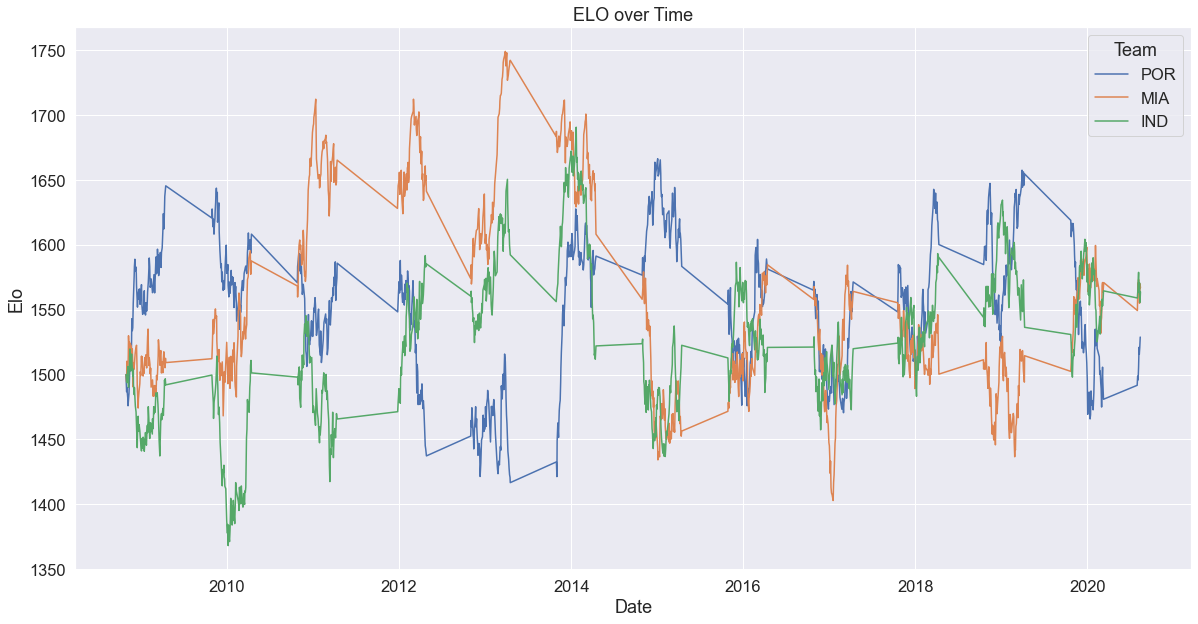

In [70]:
%matplotlib inline
import random

def runningMeanFast(x, N):
    return np.convolve(x, np.ones((N,))/N)[(N-1):]
'''
for index, row in dataset.sample(frac=0.2).iterrows():
  sns.lineplot(data=row, x=dates, y=row.values)

plt.set(xlabel="Dates")
'''
elos = teams_elo_df['Elo'].values
#teams_elo_df['Elo_moving_average'] = runningMeanFast(elos, 15)
plt.figure(figsize=(20,10))
sample_teams = random.sample(list(teams), k=3)
sns.set(font_scale=1.5)
sampled_data = teams_elo_df.loc[teams_elo_df['Team'].isin(sample_teams)]
sns.lineplot(data=sampled_data, x='Date', y='Elo', hue='Team')
plt.title("ELO over Time")

## 2.2 Recent Team Performance 

### Teams avg stats in previous ten games

In [71]:
team_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14348 entries, 0 to 14347
Data columns (total 80 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        14348 non-null  datetime64[ns]
 1   GameID      14348 non-null  object        
 2   season      14348 non-null  object        
 3   H_Team      14348 non-null  object        
 4   H_Wins      14348 non-null  int64         
 5   H_Losses    14348 non-null  int64         
 6   A_Team      14348 non-null  object        
 7   A_Wins      14348 non-null  int64         
 8   A_Losses    14348 non-null  int64         
 9   H_Loc       14348 non-null  object        
 10  H_Rslt      14348 non-null  object        
 11  A_Rslt      14348 non-null  object        
 12  H_DayOff    14348 non-null  float64       
 13  A_DayOff    14348 non-null  float64       
 14  H_PTS       14348 non-null  float64       
 15  A_PTS       14348 non-null  float64       
 16  H_AST       14348 non-

In [72]:
team_stats['GameID']

0        20081028BOS
1        20081028CHI
2        20081028LAL
3        20081029PHI
4        20081029WAS
            ...     
14343    20200813BKN
14344    20200814TOR
14345    20200814IND
14346    20200814LAC
14347    20200814HOU
Name: GameID, Length: 14348, dtype: object

In [73]:
team_stats.iloc[:, 14]

0         90.0
1        108.0
2         96.0
3         84.0
4         85.0
         ...  
14343    133.0
14344    117.0
14345    109.0
14346    107.0
14347     96.0
Name: H_PTS, Length: 14348, dtype: float64

In [74]:
team_stats.iloc[:, 53]

0         91.5
1        105.8
2         85.3
3        112.8
4        105.7
         ...  
14343    127.9
14344    108.2
14345     91.8
14346     91.7
14347    131.0
Name: A_Ortg, Length: 14348, dtype: float64

In [75]:
def get_avg_stats(team, game_date, team_season_stats, n) :
    prior_games = team_season_stats[team_season_stats['Date'] < game_date][(team_season_stats['H_Team'] == team) | (team_season_stats['A_Team'] == team)].sort_values(by = 'Date').tail(n)
    
    home_df = prior_games.iloc[:, range(3, 53 ,2)]
    home_df.columns = [x[2:] for x in home_df.columns]
    away_df = prior_games.iloc[:, range( 4, 54, 2)]
    away_df.columns = [x[2:] for x in away_df.columns ]
    
    df = pd.concat([home_df, away_df])
    df = df[df['Team']==team]
    df.drop(columns = ['Team'], inplace = True)
    
    return df.mean()

In [76]:
#Recent Performance dataframe for team stats
rp_df = pd.DataFrame()


for Season in team_stats['season'].unique():
    c1 = ['Date', 'GameID', 'season', 'H_Team', 'A_Team']
    c2 = list(team_stats.columns[14:65])
    columns = c1 + c2
    
    team_season_stats = team_stats[cleaned_team_stats['season'] == Season ].sort_values(by='Date')[columns].reset_index(drop = True)
    
    season_recent_performance = pd. DataFrame()
    
    for index, row in team_season_stats.iterrows():
        game_ID = row['GameID']
        game_date = row['Date']
        h_team = row['H_Team']
        a_team = row['A_Team']
        
        h_team_recent_performance = get_avg_stats(h_team, game_date, team_season_stats, 10)
        h_team_recent_performance.index = ['H_Last_10_gm_avg_' + x for x in h_team_recent_performance.index]
        
        a_team_recent_performance = get_avg_stats(a_team, game_date, team_season_stats, 10)
        a_team_recent_performance.index = ['A_Last_10_gm_avg_' + x for x in a_team_recent_performance.index]
        
        nrow = pd.concat([h_team_recent_performance, a_team_recent_performance], sort = False)
        nrow['GameID'] = game_ID
        
        season_recent_performance = season_recent_performance.append(nrow, ignore_index = True)
        season_recent_performance = season_recent_performance[nrow.index]
    
    rp_df = pd.concat([rp_df, season_recent_performance])
    
    



<ipython-input-75-b6402a73a58b>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  prior_games = team_season_stats[team_season_stats['Date'] < game_date][(team_season_stats['H_Team'] == team) | (team_season_stats['A_Team'] == team)].sort_values(by = 'Date').tail(n)


In [77]:
rp_df.dropna()

,H_Last_10_gm_avg_PTS,H_Last_10_gm_avg_AST,H_Last_10_gm_avg_TO,H_Last_10_gm_avg_Min,H_Last_10_gm_avg_STL,H_Last_10_gm_avg_BLK,H_Last_10_gm_avg_PF,H_Last_10_gm_avg_FGA,H_Last_10_gm_avg_FGMade,H_Last_10_gm_avg_2PA,...,A_Last_10_gm_avg_ORB,A_Last_10_gm_avg_DRB,A_Last_10_gm_avg_TRB,A_Last_10_gm_avg_PTS10,A_Last_10_gm_avg_Ortg,A_Last_10_gm_avg_Drtg,A_Last_10_gm_avg_FGMissed,A_Last_10_gm_avg_2PMissed,A_Last_10_gm_avg_3PMissed,GameID
14,117.0,39.0,13.0,240.0,6.0,7.0,25.0,91.0,44.0,49.0,...,11.0,35.0,46.0,0.0,107.20,113.10,42.0,28.0,14.0,20190321GSW
16,121.0,25.0,20.0,240.0,13.0,1.0,19.0,95.0,49.0,70.0,...,6.0,29.0,35.0,0.0,116.90,124.80,44.0,24.0,20.0,20190321SAC
18,114.0,16.0,9.0,240.0,3.0,2.0,22.0,83.0,36.0,48.0,...,13.0,39.0,52.0,0.0,106.30,116.20,53.0,26.0,27.0,20190321CHO
19,105.0,30.0,19.0,240.0,6.0,1.0,23.0,84.0,39.0,44.0,...,7.0,33.0,40.0,0.0,138.60,117.30,37.0,15.0,22.0,20190321ATL
20,123.0,30.0,17.0,265.0,11.0,5.0,27.0,87.0,45.0,51.0,...,16.0,32.0,48.0,0.0,103.50,111.60,60.0,30.0,30.0,20190322TOR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,104.4,25.7,14.2,247.5,9.0,3.9,23.4,85.9,39.9,73.7,...,9.6,33.0,42.6,0.0,107.61,102.02,41.3,29.5,11.8,20090324UTA
1055,107.1,19.1,14.4,245.0,6.5,5.2,19.4,83.9,38.9,67.7,...,15.4,29.9,45.3,0.0,111.94,110.02,47.5,40.8,6.7,20090324CHI
1056,92.5,17.3,15.8,240.0,9.5,4.4,19.9,80.8,35.6,68.3,...,12.1,30.4,42.5,0.0,112.55,108.24,44.0,32.6,11.4,20090324OKC
1057,91.9,19.7,10.8,240.0,6.1,3.8,18.2,79.0,36.1,61.8,...,11.4,32.8,44.2,0.0,109.55,115.57,46.5,34.8,11.7,20090324SAS


In [78]:
#drop avg mins 

## 2.3 Combing average stats 

### Create a final_team_stats which combines data from the recent performance dataframe with the meta data of each game. 

In [79]:
final_team_stats = team_stats.iloc[0 :, [0,1,2,3,6,14,15]].merge(elo_df.drop(columns=['H_Team', 'A_Team']), on = 'GameID') \
.merge(rp_df, on = 'GameID')

final_team_stats = final_team_stats.dropna()

In [80]:
final_team_stats

,Date,GameID,season,H_Team,A_Team,H_PTS,A_PTS,H_Team_Elo_Before,A_Team_Elo_Before,H_Team_Elo_After,...,A_Last_10_gm_avg_FTMade,A_Last_10_gm_avg_ORB,A_Last_10_gm_avg_DRB,A_Last_10_gm_avg_TRB,A_Last_10_gm_avg_PTS10,A_Last_10_gm_avg_Ortg,A_Last_10_gm_avg_Drtg,A_Last_10_gm_avg_FGMissed,A_Last_10_gm_avg_2PMissed,A_Last_10_gm_avg_3PMissed
16,2008-10-30,20081030PHO,2008-09,PHO,NOH,95.0,108.0,1508.416895,1508.416895,1493.762230,...,19.0,8.0,34.0,42.0,0.0,112.60,107.40,41.0,31.0,10.0
18,2008-10-31,20081031PHI,2008-09,PHI,NYK,116.0,87.0,1486.830104,1505.657856,1505.383439,...,27.0,14.0,32.0,46.0,0.0,116.20,111.40,45.0,29.0,16.0
19,2008-10-31,20081031TOR,2008-09,TOR,GSW,112.0,108.0,1513.169896,1491.583105,1517.801701,...,22.0,11.0,28.0,39.0,0.0,107.40,112.60,46.0,32.0,14.0
20,2008-10-31,20081031MIA,2008-09,MIA,SAC,103.0,77.0,1494.342144,1496.115314,1510.314181,...,19.0,9.0,36.0,45.0,0.0,101.40,103.50,44.0,32.0,12.0
21,2008-10-31,20081031BOS,2008-09,BOS,CHI,96.0,80.0,1505.657856,1509.8509,1517.162690,...,33.0,14.0,26.0,40.0,0.0,120.30,105.80,34.0,27.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14343,2020-08-13,20200813BKN,2019-20,BRK,POR,133.0,134.0,1519.375796,1528.949684,1514.685138,...,19.5,10.2,33.4,43.6,0.0,121.65,120.32,47.3,25.9,21.4
14344,2020-08-14,20200814TOR,2019-20,TOR,DEN,117.0,109.0,1683.717476,1549.140211,1687.594811,...,15.2,9.6,32.8,42.4,0.0,115.95,119.68,44.8,23.8,21.0
14345,2020-08-14,20200814IND,2019-20,IND,MIA,109.0,92.0,1563.843324,1566.975687,1575.776597,...,19.9,7.8,34.5,42.3,0.0,111.90,110.31,44.2,19.4,24.8
14346,2020-08-14,20200814LAC,2019-20,LAC,OKC,107.0,103.0,1643.173936,1587.447249,1647.143683,...,19.9,8.1,33.9,42.0,0.0,110.86,108.43,46.2,25.5,20.7


In [81]:
#Setting dataframes to combine into a final team performance df 
h_cols = final_team_stats.columns[final_team_stats.columns.str.startswith('H_')]

team_df = final_team_stats.iloc[0:, [0,1,2,3,4,9,10]].drop(columns = ['H_Team', 'A_Team'])
team_df_h = team_df.drop(columns=team_df.columns[team_df.columns.str.startswith('A_')])
team_df_a = team_df.drop(columns=team_df.columns[team_df.columns.str.startswith('H_')])

recent_perf_h = rp_df.drop(columns = rp_df.columns\
                           [rp_df.columns.str.startswith('A_')])
recent_perf_a = rp_df.drop(columns = rp_df.columns\
                           [rp_df.columns.str.startswith('H_')])

#Combining team_df, teams_elo_df, and recent_perf to create a team by team row df. 
tbt_h = team_df_h.merge(teams_elo_df[teams_elo_df.Where_Played == 'Home'], on = 'GameID') \
.merge(recent_perf_h, on ='GameID')

tbt_a = team_df_a.merge(teams_elo_df[teams_elo_df.Where_Played == 'Away'], on = 'GameID') \
.merge(recent_perf_h, on ='GameID')

#Removing 'H_' and 'A_', redundant information in our new df. _x, and _y will appear after first operator and will need to be removed

tbt_h.columns = tbt_h.columns.str.replace('H_', '')
tbt_h.columns = tbt_h.columns.str.replace('_x', '')
tbt_h.columns = tbt_h.columns.str.replace('_y', '')
tbt_a.columns = tbt_a.columns.str.replace('A_', '')
tbt_a.columns = tbt_a.columns.str.replace('_x', '')
tbt_a.columns = tbt_a.columns.str.replace('_y', '')
#Removing any duplicate columns 
tbt_h = tbt_h.loc[:, ~tbt_h.columns.duplicated()]
tbt_a = tbt_a.loc[:, ~tbt_a.columns.duplicated()]

#concating the away and home team by team dataframes by index
final_team_performances_df = pd.concat([tbt_h, tbt_a]).sort_index(axis=0).reset_index().drop(columns=['index'])

In [82]:
final_team_performances_df

,Date,GameID,season,Team_Elo_After,Team,Elo,Where_Played,Last_10_gm_avg_PTS,Last_10_gm_avg_AST,Last_10_gm_avg_TO,...,H_Last_10_gm_avg_FTMade,H_Last_10_gm_avg_ORB,H_Last_10_gm_avg_DRB,H_Last_10_gm_avg_TRB,H_Last_10_gm_avg_PTS10,H_Last_10_gm_avg_Ortg,H_Last_10_gm_avg_Drtg,H_Last_10_gm_avg_FGMissed,H_Last_10_gm_avg_2PMissed,H_Last_10_gm_avg_3PMissed
0,2008-10-30,20081030PHO,2008-09,1493.762230,PHO,1508.416895,Home,103.0,24.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2008-10-30,20081030PHO,2008-09,1523.071560,NOH,1508.416895,Away,NaN,NaN,NaN,...,19.0,9.0,30.0,39.0,0.0,116.60,110.90,40.0,31.0,9.0
2,2008-10-31,20081031PHI,2008-09,1505.383439,PHI,1486.830104,Home,84.0,15.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2008-10-31,20081031PHI,2008-09,1487.104521,NYK,1505.657856,Away,NaN,NaN,NaN,...,21.0,23.0,33.0,56.0,0.0,99.80,112.80,55.0,40.0,15.0
4,2008-10-31,20081031TOR,2008-09,1517.801701,TOR,1513.169896,Home,95.0,24.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28267,2020-08-14,20200814IND,2019-20,1575.776597,IND,1563.843324,Home,110.4,24.0,13.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28268,2020-08-14,20200814LAC,2019-20,1583.477502,OKC,1587.447249,Away,NaN,NaN,NaN,...,21.7,8.9,36.5,45.4,0.0,120.43,112.98,45.0,23.0,22.0
28269,2020-08-14,20200814LAC,2019-20,1647.143683,LAC,1643.173936,Home,118.8,22.1,11.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28270,2020-08-14,20200814HOU,2019-20,1535.391950,HOU,1570.072227,Home,114.8,22.4,15.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2.4 Label column and save df to csv

Creating a final "Label" that differentiates between winner and loser for our evaluation. 

In [83]:
final_team_stats['Label'] = [1 if x > 0 else 0 for x in final_team_stats['H_PTS'] - final_team_stats['A_PTS']]

final_team_stats.drop(columns = ['H_PTS', 'A_PTS'], inplace = True)
final_team_stats = final_team_stats.dropna()
final_team_stats.reset_index(inplace = True)

combined_df = final_team_stats

final_team_stats

,index,Date,GameID,season,H_Team,A_Team,H_Team_Elo_Before,A_Team_Elo_Before,H_Team_Elo_After,A_Team_Elo_After,...,A_Last_10_gm_avg_ORB,A_Last_10_gm_avg_DRB,A_Last_10_gm_avg_TRB,A_Last_10_gm_avg_PTS10,A_Last_10_gm_avg_Ortg,A_Last_10_gm_avg_Drtg,A_Last_10_gm_avg_FGMissed,A_Last_10_gm_avg_2PMissed,A_Last_10_gm_avg_3PMissed,Label
0,16,2008-10-30,20081030PHO,2008-09,PHO,NOH,1508.416895,1508.416895,1493.762230,1523.071560,...,8.0,34.0,42.0,0.0,112.60,107.40,41.0,31.0,10.0,0
1,18,2008-10-31,20081031PHI,2008-09,PHI,NYK,1486.830104,1505.657856,1505.383439,1487.104521,...,14.0,32.0,46.0,0.0,116.20,111.40,45.0,29.0,16.0,1
2,19,2008-10-31,20081031TOR,2008-09,TOR,GSW,1513.169896,1491.583105,1517.801701,1486.951300,...,11.0,28.0,39.0,0.0,107.40,112.60,46.0,32.0,14.0,1
3,20,2008-10-31,20081031MIA,2008-09,MIA,SAC,1494.342144,1496.115314,1510.314181,1480.143277,...,9.0,36.0,45.0,0.0,101.40,103.50,44.0,32.0,12.0,1
4,21,2008-10-31,20081031BOS,2008-09,BOS,CHI,1505.657856,1509.8509,1517.162690,1498.346066,...,14.0,26.0,40.0,0.0,120.30,105.80,34.0,27.0,7.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14131,14343,2020-08-13,20200813BKN,2019-20,BRK,POR,1519.375796,1528.949684,1514.685138,1533.640341,...,10.2,33.4,43.6,0.0,121.65,120.32,47.3,25.9,21.4,0
14132,14344,2020-08-14,20200814TOR,2019-20,TOR,DEN,1683.717476,1549.140211,1687.594811,1545.262876,...,9.6,32.8,42.4,0.0,115.95,119.68,44.8,23.8,21.0,1
14133,14345,2020-08-14,20200814IND,2019-20,IND,MIA,1563.843324,1566.975687,1575.776597,1555.042414,...,7.8,34.5,42.3,0.0,111.90,110.31,44.2,19.4,24.8,1
14134,14346,2020-08-14,20200814LAC,2019-20,LAC,OKC,1643.173936,1587.447249,1647.143683,1583.477502,...,8.1,33.9,42.0,0.0,110.86,108.43,46.2,25.5,20.7,1


In [84]:
final_team_stats.to_csv('final_team_stats.csv')

## 2.5 Creating Recent Player Performance DataFrame

Like the average team stats per 10 games, we will do the same for the player stats for their previous 10 games

### Read In Player Stats

In [85]:
playerstats = pd.read_csv('Cleaned_Player_Stats.csv', index_col = 0)

playerstats = playerstats.sort_values(by='Date').reset_index(drop = True)

IDseason = final_team_stats[['season', 'GameID']].drop_duplicates()

playerstats.rename(columns={'gameID': 'GameID'}, inplace=True)

IDseason.head()

,season,GameID
0,2008-09,20081030PHO
1,2008-09,20081031PHI
2,2008-09,20081031TOR
3,2008-09,20081031MIA
4,2008-09,20081031BOS


In [86]:
playerstats.head()

,Player,Team,Against,Date,Home,MP,FG,FGA,3P,3PA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,+/-,GameID
0,LeBron James,Cleveland Cavaliers,Boston Celtics,2008-10-28,0,36.00,9.0,21.0,0.0,4.0,...,6.0,7.0,6.0,2.0,1.0,3.0,4.0,22.0,-3.0,20081028BOS
1,Zydrunas Ilgauskas,Cleveland Cavaliers,Boston Celtics,2008-10-28,0,30.24,3.0,5.0,0.0,0.0,...,5.0,8.0,1.0,0.0,0.0,4.0,3.0,15.0,7.0,20081028BOS
2,Ben Wallace,Cleveland Cavaliers,Boston Celtics,2008-10-28,0,19.03,1.0,1.0,0.0,0.0,...,4.0,4.0,0.0,0.0,1.0,1.0,2.0,2.0,-1.0,20081028BOS
3,Anderson Varejão,Cleveland Cavaliers,Boston Celtics,2008-10-28,0,26.09,3.0,6.0,0.0,0.0,...,5.0,9.0,1.0,3.0,0.0,2.0,2.0,9.0,-7.0,20081028BOS
4,Daniel Gibson,Cleveland Cavaliers,Boston Celtics,2008-10-28,0,22.38,2.0,8.0,0.0,2.0,...,3.0,3.0,3.0,0.0,0.0,0.0,1.0,6.0,-8.0,20081028BOS


In [87]:
merge = playerstats.merge(IDseason , how='left', on='GameID')

In [88]:
merge

,Player,Team,Against,Date,Home,MP,FG,FGA,3P,3PA,...,TRB,AST,STL,BLK,TOV,PF,PTS,+/-,GameID,season
0,LeBron James,Cleveland Cavaliers,Boston Celtics,2008-10-28,0,36.00,9.0,21.0,0.0,4.0,...,7.0,6.0,2.0,1.0,3.0,4.0,22.0,-3.0,20081028BOS,NaN
1,Zydrunas Ilgauskas,Cleveland Cavaliers,Boston Celtics,2008-10-28,0,30.24,3.0,5.0,0.0,0.0,...,8.0,1.0,0.0,0.0,4.0,3.0,15.0,7.0,20081028BOS,NaN
2,Ben Wallace,Cleveland Cavaliers,Boston Celtics,2008-10-28,0,19.03,1.0,1.0,0.0,0.0,...,4.0,0.0,0.0,1.0,1.0,2.0,2.0,-1.0,20081028BOS,NaN
3,Anderson Varejão,Cleveland Cavaliers,Boston Celtics,2008-10-28,0,26.09,3.0,6.0,0.0,0.0,...,9.0,1.0,3.0,0.0,2.0,2.0,9.0,-7.0,20081028BOS,NaN
4,Daniel Gibson,Cleveland Cavaliers,Boston Celtics,2008-10-28,0,22.38,2.0,8.0,0.0,2.0,...,3.0,3.0,0.0,0.0,0.0,1.0,6.0,-8.0,20081028BOS,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291003,Chris Clemons,Houston Rockets,Philadelphia 76ers,2020-08-14,1,16.36,2.0,7.0,0.0,5.0,...,1.0,4.0,1.0,1.0,1.0,4.0,4.0,-23.0,20200814HOU,2019-20
291004,Luc Mbah a Moute,Houston Rockets,Philadelphia 76ers,2020-08-14,1,13.55,1.0,3.0,0.0,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,3.0,-14.0,20200814HOU,2019-20
291005,Austin Rivers,Houston Rockets,Philadelphia 76ers,2020-08-14,1,12.21,0.0,2.0,0.0,2.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,-16.0,20200814HOU,2019-20
291006,James Harden,Houston Rockets,Philadelphia 76ers,2020-08-14,1,26.17,9.0,16.0,4.0,9.0,...,3.0,10.0,1.0,2.0,7.0,1.0,27.0,-11.0,20200814HOU,2019-20


## Define Function For Avg Stats 

In [89]:
def rolling_average_last_n_games(n):
    playerstats_recent = pd.DataFrame
    
    for season in playerstats['season'].unique():
        season_stats = playerstats[playerstats['season']==season]
        
        for player in season_stats['Player'].unique():
            player_performance = season_stats[season_stats['Player']==player].rolling(n, min_periods=1).mean().shift(1)
            
            playerstats_recent = playerstats_recent.append(player_performance, ignore_index = False)
        
        #renaming columns to reflect 10 game avg
        playerstats_recent.columns = ['Last_' + str(n) + '_Avg_' + x for x in playerstats_recent.columns]
        #merging playerstats to playerstats_recent and at the same time removing the redundent current game avg stats.
        playerstats_recent = playerstats[['Player', 'GameID']].merge(playerstats_recent.drop(columns = 'Last_' + str(n) + '_Avg_' + 'GameID'), left_index=True, right_index=True)
        
        return playerstats_recent

In [90]:
player_recent_performance = rolling_average_last_n_games(10)

player_recent_performance

KeyError: 'season'

# Previously version work to be sorted...

In [ ]:
#website - "https://www.kaggle.com/heeebsinc/nbaseasonstats201820"
#The above datasets are split into season from 2000 to 2020. We are only interested in 2008 - 2020.
cs_player= pd.read_csv('/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/DS_Guided_Capstone_2_Repo/virenv/player_stats/2008-2009.csv')

In [ ]:
cs_player.info()

In [ ]:
cs_player.head()

In [ ]:
print(cs_player['GameLink'])

In [ ]:
#Code for removing columns for future reference. 
#cs_player = cs_player.drop(['GameLink'], axis=1)

In [ ]:
#Question, when trying to add seasons to the dataset, it seems to immediately jump to 2019 instead of following
#the start year as noted below.
start_year = 2008
end_year = 2009

player_stats_combined_df = pd.DataFrame()

for i in range(12) :
  player_stats_file_path = '/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/DS_Guided_Capstone_2_Repo/virenv/player_stats/' + str(start_year) + "-" + str(end_year) + '.csv'

  player_stats_combined_df = player_stats_combined_df.append(pd.read_csv(player_stats_file_path))

  start_year = start_year + 1
  end_year = end_year + 1

In [ ]:
player_stats_combined_df.head()

In [ ]:
#set(player_stats_combined_df['Season'])

In [ ]:
player_stats_combined_df.info()

In [ ]:
player_stats_combined_df.describe()

In [ ]:
player_stats_combined_df.isnull().sum()

In [ ]:
player_stats_combined_df[player_stats_combined_df['3P%'].isnull()]

In [ ]:
threeptking = player_stats_combined_df[['Player','Team', 'Against', 'Date', '3PA', 'PTS']][player_stats_combined_df['3P%']==1]
threeptking[threeptking['3PA']>8]

In [ ]:
print(player_stats_combined_df[['Player','Date','3PA','Against','3P%']][player_stats_combined_df['3PA']>8])

In [ ]:
player_stats_combined_df['Ast/To'] = player_stats_combined_df['AST']/player_stats_combined_df['TOV']

In [ ]:
player_stats_combined_df = player_stats_combined_df.drop(['GameLink'], axis = 1)

In [ ]:
player_stats_combined_df['Date'] = pd.to_datetime(player_stats_combined_df['Date'])

In [ ]:
player_stats_combined_df['Date']

In [ ]:
#Dataset acquired from kaggle: 
#website - "https://www.kaggle.com/rafaelgreca/nba-games-box-score-since-1949"

cs_team = pd.read_csv('/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/DS_Guided_Capstone_2_Repo/virenv/team_stats/2019-2020.csv')

In [ ]:
cs_team.info()

In [ ]:
print(cs_team.columns.tolist())

In [ ]:
cs_team.head()

In [ ]:
start_year = 2008
end_year = 2009

team_stats_combined_df = pd.DataFrame()

for i in range(12) :
  team_stats_file_path = '/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/DS_Guided_Capstone_2_Repo/virenv/team_stats/' + str(start_year) + "-" + str(end_year) + '.csv'
  
  team_stats_combined_df = team_stats_combined_df.append(pd.read_csv(team_stats_file_path, index_col = 0))
  
  start_year = start_year + 1
  end_year = end_year + 1

In [ ]:
team_stats_combined_df.describe()

In [ ]:
team_stats_combined_df.isnull().sum()!=0

In [ ]:
team_stats_combined_df.columns[team_stats_combined_df.isnull().any()].tolist()

In [ ]:
#Dataset from prior investigation - NBA Combined Player Stats
#website - "https://towardsdatascience.com/predicting-the-outcome-of-nba-games-with-machine-learning-a810bb768f20"

ps_player = pd.read_csv('NBA_Combined_Player_Stats.csv', index_col= 0)

In [ ]:
ps_player.head()

In [ ]:
ps_player.info()

In [ ]:
## 2.2 REVIEWING PRIOR INVESTIGATION'S TEAM STATISTICS 

In [ ]:
#Dataset from prior investigation - NBA Combined Team Stats 
#website - "https://towardsdatascience.com/predicting-the-outcome-of-nba-games-with-machine-learning-a810bb768f20"

ps_team = pd.read_csv('/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/DS_Guided_Capstone_2_Repo/virenv/NBA_Combined_Team_Stats.csv', index_col=0)

In [ ]:
ps_team.info()

In [ ]:
ps_team.head()

In [ ]:
ps_team.columns.to_list()

In [ ]:
range(3, 43, 2)